In [1]:
%%info

ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
4,application_1588621913530_0005,pyspark,dead,Link,,


In [2]:

sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("seaborn==0.10.0")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
5,application_1588621913530_0006,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached pandas-1.0.3-cp36-cp36m-manylinux1_x86_64.whl (10.0 MB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)

  Using cached matplotlib-3.2.1-cp36-cp36m-manylinux1_x86_64.whl (12.4 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached kiwisolver-1.2.0-cp36-cp36m-manylinux1_x86_64.whl (88 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)

  Using cached seaborn-0.10.0-py3-none-any.whl (215 kB)
  Using cached scipy-1.4.1-cp36-cp36m-manylinux1_x86_64.whl (26.1 MB)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
user=spark.read.json('s3://sta9760-laura-spark-datasets/yelp-dataset/yelp_academic_dataset_user.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
print(f'Total Columns: {len(user.dtypes)}')
print(f'Total Rows: {user.count():,}')
user.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 22
Total Rows: 1,968,703
root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

In [10]:
user.createOrReplaceTempView('YelpUser')
elite_user = spark.sql(
'''
SELECT average_stars, user_id, elite, name, review_count
FROM YelpUser
WHERE elite !=""

'''
)
elite_user.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------+--------------------+--------------------+------------+------------+
|average_stars|             user_id|               elite|        name|review_count|
+-------------+--------------------+--------------------+------------+------------+
|         3.84|FOBRPlBHa3WPHFB5q...|2008,2009,2010,20...|    Michelle|         564|
|         3.44|zZUnPeh2hEp0WydbA...|                2010|      Martin|          60|
|         3.08|QaELAmRcDc5TfJEyl...|                2009|        John|         206|
|         4.37|xvu8G900tezTzbbfq...|2009,2010,2011,20...|        Anne|         485|
|         2.88|z5_82komKV3mI4ASG...|                2007|       Steve|         186|
|         3.63|f4_MRNHvN-yRn7EA8...|2011,2012,2013,20...|    Jennifer|         822|
|          4.1|QG13XBbgHWydzThRB...|           2008,2009|      Claire|         218|
|         3.63|I_6wY8_RsewziNnKh...|2010,2011,2012,20...|        Jeff|         405|
|         3.37|q-v8elVPvKz0KvK69...|2011,2012,2013,20...|  Lisa Marie|      

In [11]:
review=spark.read.json('s3://sta9760-laura-spark-datasets/yelp-dataset/yelp_academic_dataset_review.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [12]:
review.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

In [13]:
review.createOrReplaceTempView('YelpReview')

review_sqldf = spark.sql(
'''
SELECT business_id, stars, user_id
FROM YelpReview

'''
)
review_sqldf.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+--------------------+
|         business_id|stars|             user_id|
+--------------------+-----+--------------------+
|-MhfebM0QIsKt87iD...|  2.0|OwjRMXRC0KyPrIlcj...|
|lbrU8StCq3yDfr-QM...|  1.0|nIJD_7ZXHq-FX8byP...|
|HQl28KMwrEKHqhFrr...|  5.0|V34qejxNsCbcgD8C0...|
|5JxlZaqCnk1MnbgRi...|  1.0|ofKDkJKXSKZXu5xJN...|
|IS4cv902ykd8wj1TR...|  4.0|UgMW8bLE0QMJDCkQ1...|
+--------------------+-----+--------------------+
only showing top 5 rows

In [14]:
review_avg=review_sqldf.groupby('business_id').agg({'stars':'mean'})
review_avg.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|        avg(stars)|
+--------------------+------------------+
|ATeOjZzE3VOI-RW7F...| 3.433734939759036|
|RMjCnixEY5i12Ciqn...|3.5316455696202533|
|vbUABNAQI2iwN7v0x...|2.4545454545454546|
|VHsNB3pdGVcRgs6C3...| 3.411764705882353|
|r-W1HPIZ3V6S2DaXh...| 4.852459016393443|
+--------------------+------------------+
only showing top 5 rows

In [15]:
review_compare=review_avg.join(review_sqldf, on="business_id", how="inner")
review_compare.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------------+-----+--------------------+
|         business_id|      avg(stars)|stars|             user_id|
+--------------------+----------------+-----+--------------------+
|--9e1ONYQuAa-CB_R...|4.11784140969163|  5.0|mBBGHMLDDmtptNIu0...|
|--9e1ONYQuAa-CB_R...|4.11784140969163|  4.0|5WBIwR92ZNVmsG7bR...|
|--9e1ONYQuAa-CB_R...|4.11784140969163|  5.0|3HG4RGeej4dZiMo5s...|
|--9e1ONYQuAa-CB_R...|4.11784140969163|  3.0|bWJWcQyDKtFSvsTW2...|
|--9e1ONYQuAa-CB_R...|4.11784140969163|  5.0|HaqStKX7oqpx5ymDH...|
+--------------------+----------------+-----+--------------------+
only showing top 5 rows

In [16]:
user_review_compare=review_compare.join(user, on="user_id", how="inner")
user_review_compare=user_review_compare.select('avg(stars)','stars', 'elite','review_count')
user_review_compare.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+-----+--------------------+------------+
|        avg(stars)|stars|               elite|review_count|
+------------------+-----+--------------------+------------+
|            4.0125|  4.0|                    |          55|
| 2.310344827586207|  2.0|                    |           3|
|2.9904761904761905|  4.0|2011,2012,2013,20...|         163|
|3.3636363636363638|  5.0|                    |           7|
|3.3333333333333335|  5.0|                    |           7|
+------------------+-----+--------------------+------------+
only showing top 5 rows

In [17]:
import pyspark.sql.functions as F
review_skew = user_review_compare.withColumn("skew", F.round((F.col('avg(stars)')-F.col('stars'))/F.col('stars'), 3))
review_skew.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+-----+--------------------+------------+------+
|        avg(stars)|stars|               elite|review_count|  skew|
+------------------+-----+--------------------+------------+------+
|            4.0125|  4.0|                    |          55| 0.003|
| 2.310344827586207|  2.0|                    |           3| 0.155|
|2.9904761904761905|  4.0|2011,2012,2013,20...|         163|-0.252|
|3.5925925925925926|  1.0|                    |           7| 2.593|
|2.8392857142857144|  1.0|                    |           7| 1.839|
+------------------+-----+--------------------+------------+------+
only showing top 5 rows

In [18]:
elite_review_skew=review_skew.filter(F.col('elite')!='')
elite_review_skew.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+-----+--------------------+------------+------+
|        avg(stars)|stars|               elite|review_count|  skew|
+------------------+-----+--------------------+------------+------+
|2.9904761904761905|  4.0|2011,2012,2013,20...|         163|-0.252|
|3.5365853658536586|  4.0|2007,2008,2009,20...|         699|-0.116|
|3.9642718446601943|  5.0|2007,2008,2009,20...|         699|-0.207|
|2.6060495626822155|  2.0|2007,2008,2009,20...|         699| 0.303|
|2.4945054945054945|  3.0|2007,2008,2009,20...|         699|-0.168|
|3.7034529451591065|  4.0|2007,2008,2009,20...|         699|-0.074|
| 3.981390793339863|  3.0|2007,2008,2009,20...|         699| 0.327|
|3.3309608540925266|  4.0|2007,2008,2009,20...|         699|-0.167|
|3.5885558583106265|  3.0|2007,2008,2009,20...|         699| 0.196|
| 3.922794117647059|  2.0|2007,2008,2009,20...|         699| 0.961|
|3.0376166114956367|  3.0|2007,2008,2009,20...|         699| 0.013|
| 4.292341678939617|  4.0|2007,2008,2009,20...| 

In [19]:
non_elite_review_skew=review_skew.filter(F.col('elite')=='')
non_elite_review_skew.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+-----+-----+------------+-----+
|        avg(stars)|stars|elite|review_count| skew|
+------------------+-----+-----+------------+-----+
|            4.0125|  4.0|     |          55|0.003|
| 2.310344827586207|  2.0|     |           3|0.155|
| 2.367816091954023|  1.0|     |           7|1.368|
|3.5925925925925926|  1.0|     |           7|2.593|
|2.8392857142857144|  1.0|     |           7|1.839|
+------------------+-----+-----+------------+-----+
only showing top 5 rows

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

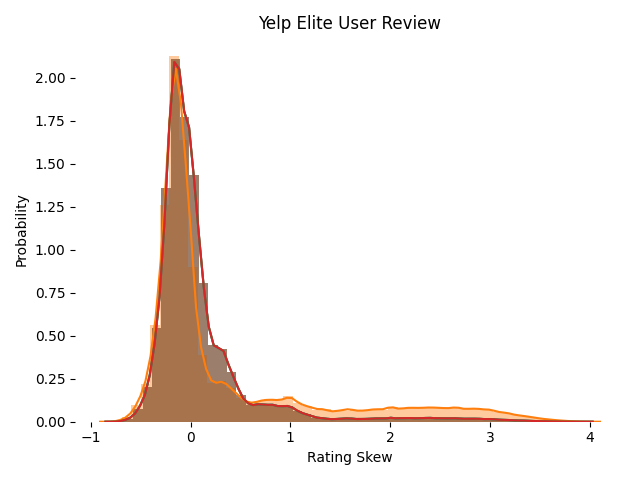

In [25]:
result_pdf = elite_review_skew.toPandas()
sns.distplot(result_pdf['skew'])    
plt.title('Yelp Elite User Review')
plt.xlabel('Rating Skew')
plt.ylabel('Probability')
plt.tight_layout()
plt.box(False)
#plt.xlim(-0.5, 1.25)
#plt.ylim(0, 10)
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

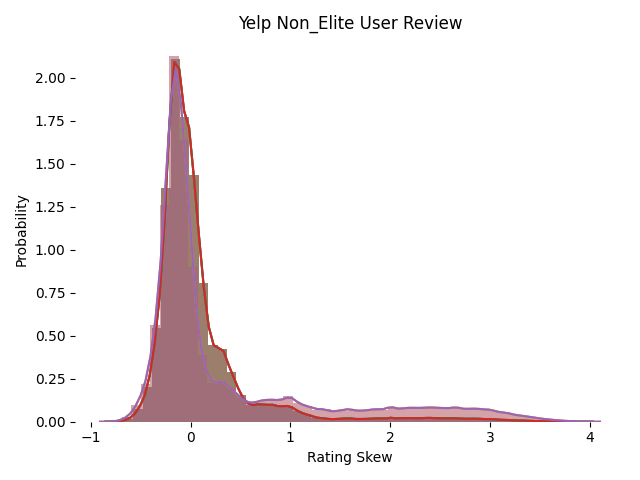

In [26]:
result_pdf = non_elite_review_skew.toPandas()
sns.distplot(result_pdf['skew'])    
plt.title('Yelp Non_Elite User Review')
plt.xlabel('Rating Skew')
plt.ylabel('Probability')
plt.tight_layout()
plt.box(False)
#plt.xlim(-0.5, 1.25)
#plt.ylim(0, 10)
%matplot plt

## Conclusiton: Elite user has no significant different in terms of accurate of the ratings.